### ДЗ-2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

Доверительный интревал №1:$$[\sum X_k^2/\lambda_{(1+\gamma)/2},\sum X_k^2/\lambda_{(1-\gamma)/2}] $$

Доверительный интревал №2:$$[n \sum X_k^2/z_{(3+\gamma)/4}^2,n \sum X_k^2/z_{(3-\gamma)/4}^2] $$

In [59]:
def conf_intevals_testing(std = 1, alpha = 0.99):
    n_samples = np.arange(100,10000,50)
    conf_interval_1, conf_interval_2 = [], []

    for n in n_samples:

        X = norm.rvs(scale = std**2, size=n)  

        lower_1 = np.sum(X**2)/stats.chi2.ppf((1+alpha)/ 2, n)
        upper_1  = np.sum(X**2)/stats.chi2.ppf((1 - alpha)/ 2, n)
        conf_interval_1.append(upper_1-lower_1)

        lower_2 = n*np.sum(X**2)/(stats.norm.ppf((3+alpha)/4, n))**2
        upper_2 = n*np.sum(X**2)/(stats.norm.ppf((3-alpha)/4, n))**2
        conf_interval_2.append(upper_2-lower_2)

    print(f"1: [{lower_1}, D[X]: {np.var(X)}, {upper_1}]")
    print(f"2: [{lower_2}, D[X]: {np.var(X)}, {upper_2}]")
    plt.figure(figsize=(12,8))   
    plt.plot(n_samples,conf_interval_1, label ="1" )
    plt.plot(n_samples,conf_interval_2, label ="2" )
    plt.xlabel("Размер выборки")
    plt.ylabel("Длина доверительного интервала")
    plt.legend()

1: [0.9685972348600349, D[X]: 1.004274945855514, 1.041994453535339]
2: [1.003768749868624, D[X]: 1.004274945855514, 1.00433391900385]


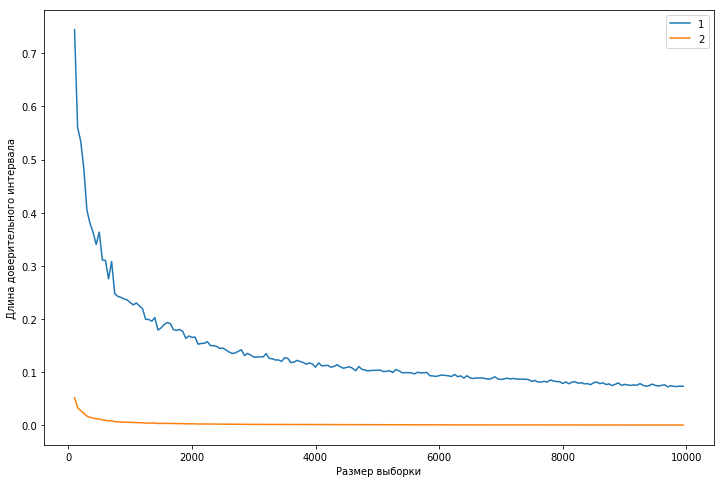

In [60]:
conf_intevals_testing()

1: [595.2735614568487, D[X]: 617.2355038542771, 640.3814991934136]
2: [616.8890196137382, D[X]: 617.2355038542771, 617.2363572189297]


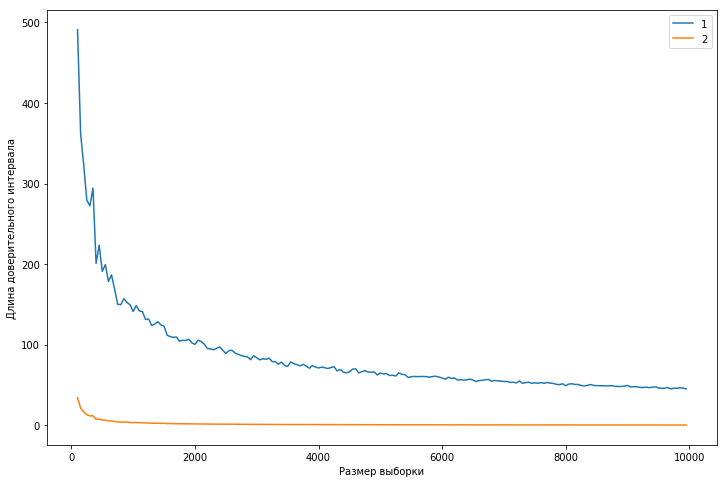

In [61]:
conf_intevals_testing(std = 5)

#### Выводы: 
В обоих случаях длина доверительного интервала уменьшается с увеличением выборки.
Второй доверительный интервал более точный, чем первый. 